## 1. Introduction
The purpose of this project is to explore which programming languages and technologies are most popular with users on Stack Overflow. 
I am adapting the R programming languages notebook and rewriting it in Python. 
"Each Stack Overflow question has a tag, which marks a question to describe its topic or technology. For instance, there's a tag for languages like R or Python, and for packages like ggplot2 or pandas."

In [1]:
import pandas as pd
import numpy as np

In [3]:
# Load dataset
by_tag_year = pd.read_csv('Datasets/by_tag_year.csv')

# Inspect the dataset
by_tag_year

,year,tag,number,year_total
0,2008,.htaccess,54,58390
1,2008,.net,5910,58390
2,2008,.net-2.0,289,58390
3,2008,.net-3.5,319,58390
4,2008,.net-4.0,6,58390
...,...,...,...,...
40513,2018,zlib,89,1085170
40514,2018,zoom,196,1085170
40515,2018,zsh,175,1085170
40516,2018,zurb-foundation,182,1085170


## 2. Add Fraction Column
Rather than just view the number of questions asked as a count, adjust to show a percentage: the fraction of quesitons that year that have a particular tag.
This column will be added to the table

In [4]:
# Add fraction column
fraction = by_tag_year['number']/by_tag_year['year_total']
by_tag_year['fraction'] = fraction

In [5]:
by_tag_year

,year,tag,number,year_total,fraction
0,2008,.htaccess,54,58390,0.000925
1,2008,.net,5910,58390,0.101216
2,2008,.net-2.0,289,58390,0.004949
3,2008,.net-3.5,319,58390,0.005463
4,2008,.net-4.0,6,58390,0.000103
...,...,...,...,...,...
40513,2018,zlib,89,1085170,0.000082
40514,2018,zoom,196,1085170,0.000181
40515,2018,zsh,175,1085170,0.000161
40516,2018,zurb-foundation,182,1085170,0.000168


## 3. Has Python been growing or shrinking?
The original notebook looked at the trend of R, however I am interested in viewing the trend for Python.
I will investigate if the faction of Stack Overflow questions about R has been increasing or decreasing over time. 

In [13]:
# Filter for Python tags
py_over_time = by_tag_year[by_tag_year['tag']=='python']

# Print the new table
py_over_time

,year,tag,number,year_total,fraction
1794,2008,python,2080,58390,0.035623
4796,2009,python,12906,343868,0.037532
8105,2010,python,27098,694391,0.039024
11615,2011,python,42313,1200551,0.035245
15325,2012,python,64456,1645404,0.039173
19158,2013,python,96803,2060473,0.046981
23103,2014,python,116945,2164701,0.054024
27122,2015,python,137861,2219527,0.062113
31173,2016,python,159436,2226072,0.071622
35233,2017,python,203522,2305207,0.088288


## 4. Visualise the change over time
Convert the results in the table above, to a visualisation. Change over time is usually visualised with a line plot.

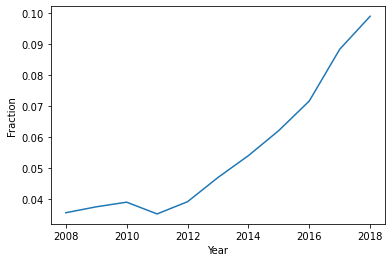

In [16]:
# Load matplotlib
import matplotlib.pyplot as plt

# Create a line plot of fraction over time
plt.plot(py_over_time['year'], py_over_time['fraction'])
plt.xlabel('Year')
plt.ylabel('Fraction')

plt.show()

## 5. How about pandas and matplotlib?
There is a slight dip in 2011, but since then Python seems to be on an upwards trend.

Besides Python I will look now at 'matplotlib' and 'pandas', as they also have Stack Overflow tags.

Instead of just looking at Python, I will look at all three tags and their change over time. Are each of those tags increasing as a fraction of overall questions? Are any of the tags decreasing?

In [84]:
# An array of selected tags
sel_tags = ['python', 'matplotlib', 'pandas']

# Filter for the tags included in sel_tags
sel_tags_over_time = by_tag_year[by_tag_year.tag.isin(sel_tags)]
print(sel_tags_over_time)

       year         tag  number  year_total  fraction
1357   2008  matplotlib       4       58390  0.000069
1794   2008      python    2080       58390  0.035623
4278   2009  matplotlib      86      343868  0.000250
4796   2009      python   12906      343868  0.037532
7545   2010  matplotlib     331      694391  0.000477
8105   2010      python   27098      694391  0.039024
11033  2011  matplotlib     811     1200551  0.000676
11401  2011      pandas      12     1200551  0.000010
11615  2011      python   42313     1200551  0.035245
14714  2012  matplotlib    1617     1645404  0.000983
15100  2012      pandas     753     1645404  0.000458
15325  2012      python   64456     1645404  0.039173
18530  2013  matplotlib    2997     2060473  0.001455
18925  2013      pandas    3038     2060473  0.001474
19158  2013      python   96803     2060473  0.046981
22458  2014  matplotlib    3910     2164701  0.001806
22864  2014      pandas    5683     2164701  0.002625
23103  2014      python  116

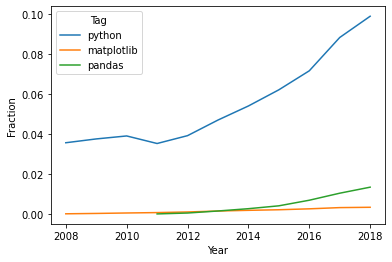

In [92]:
# Plot the line graph
fig,ax = plt.subplots()


for tag in sel_tags:
    tag_plot = sel_tags_over_time[sel_tags_over_time.tag==tag]
    ax.plot(tag_plot.year, tag_plot.fraction, label=tag)
    
plt.xlabel('Year')
plt.ylabel('Fraction')
plt.legend(title='Tag')

The graph shows that there are not as many questions asked about matplotlib or pandas as there are about Python.
Matplotlib doesn't have much increase, but pandas is steadily growing.

## 6. What are the most asked about tags? 
Which tags have the most questions overall

In [44]:
# Find total number of questions for each tag
sorted_tags = by_tag_year.groupby('tag').count()
sorted_tags

,year,number,year_total,fraction
tag,,,,
.htaccess,11,11,11,11
.net,11,11,11,11
.net-2.0,11,11,11,11
.net-3.5,11,11,11,11
.net-4.0,11,11,11,11
...,...,...,...,...
zlib,11,11,11,11
zoom,11,11,11,11
zsh,11,11,11,11
